<a href="https://colab.research.google.com/github/mucahitozkaya/app/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [77]:
train_final = pd.read_parquet("https://drive.google.com/uc?id=1ZeXb2EBMkP-nzULonq_hDnIxF5u9PwKp")
test_final = pd.read_parquet("https://drive.google.com/uc?id=1Blepx7rAAUXFLLNIL8gCI2g1IcNoMfTk")
submission_sample = pd.read_parquet("https://drive.google.com/uc?id=1KCcrx84tmG5biO0MjLmnFhvCMSC-U6ge")

In [61]:
train_final

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.197737,1.113360,-1.123334,...,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336352,2.567766,-0.494908,...,-0.983938,-1.453756,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4"
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561455,2.061736,-0.184511,...,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
3,f2d2b25073ccc298eced86897,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.529918,3.358050,-0.851366,...,-1.861418,-1.219658,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41,"menu6, menu2, menu1"
4,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922361,2.096124,0.060796,...,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94044,2e54f32ced9fae6ef802ceaa2,12,44.397,43.425,41.678,O2 - DE,HUAWEI,-1.531534,2.596604,0.340233,...,-1.484154,-1.988186,0.044385,0.863442,0.761354,1.073711,-3.560019,29,68,"menu2, menu8, menu4"
94045,6aa4ff0f6cc5ef4c2980b2862,12,44.331,43.977,40.620,TURKCELL,samsung,-1.268987,2.300487,0.231711,...,-0.632773,-1.624605,2.406462,-0.340132,-0.893553,-2.061401,-1.908158,25,43,"menu9, menu2, menu5"
94046,fa842185a0edd210845b78308,12,44.142,43.591,41.736,VODAFONE TR,Apple,-1.950039,2.805681,0.438200,...,0.184886,-3.477337,0.449427,0.445361,-0.495204,-0.955097,-3.843092,4,25,"menu6, menu2, menu4"
94047,db8f55b8499f8d8c05148240e,12,43.963,43.350,40.862,TURK TELEKOM,Redmi,-2.389140,2.358281,0.683524,...,-0.186062,-2.329308,0.864857,1.284815,-0.100755,-1.056479,-1.452037,25,60,"menu6, menu8, menu4"


In [81]:
df = train_final

In [94]:
label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df['target'])
df['target_encoded'].nunique()

112

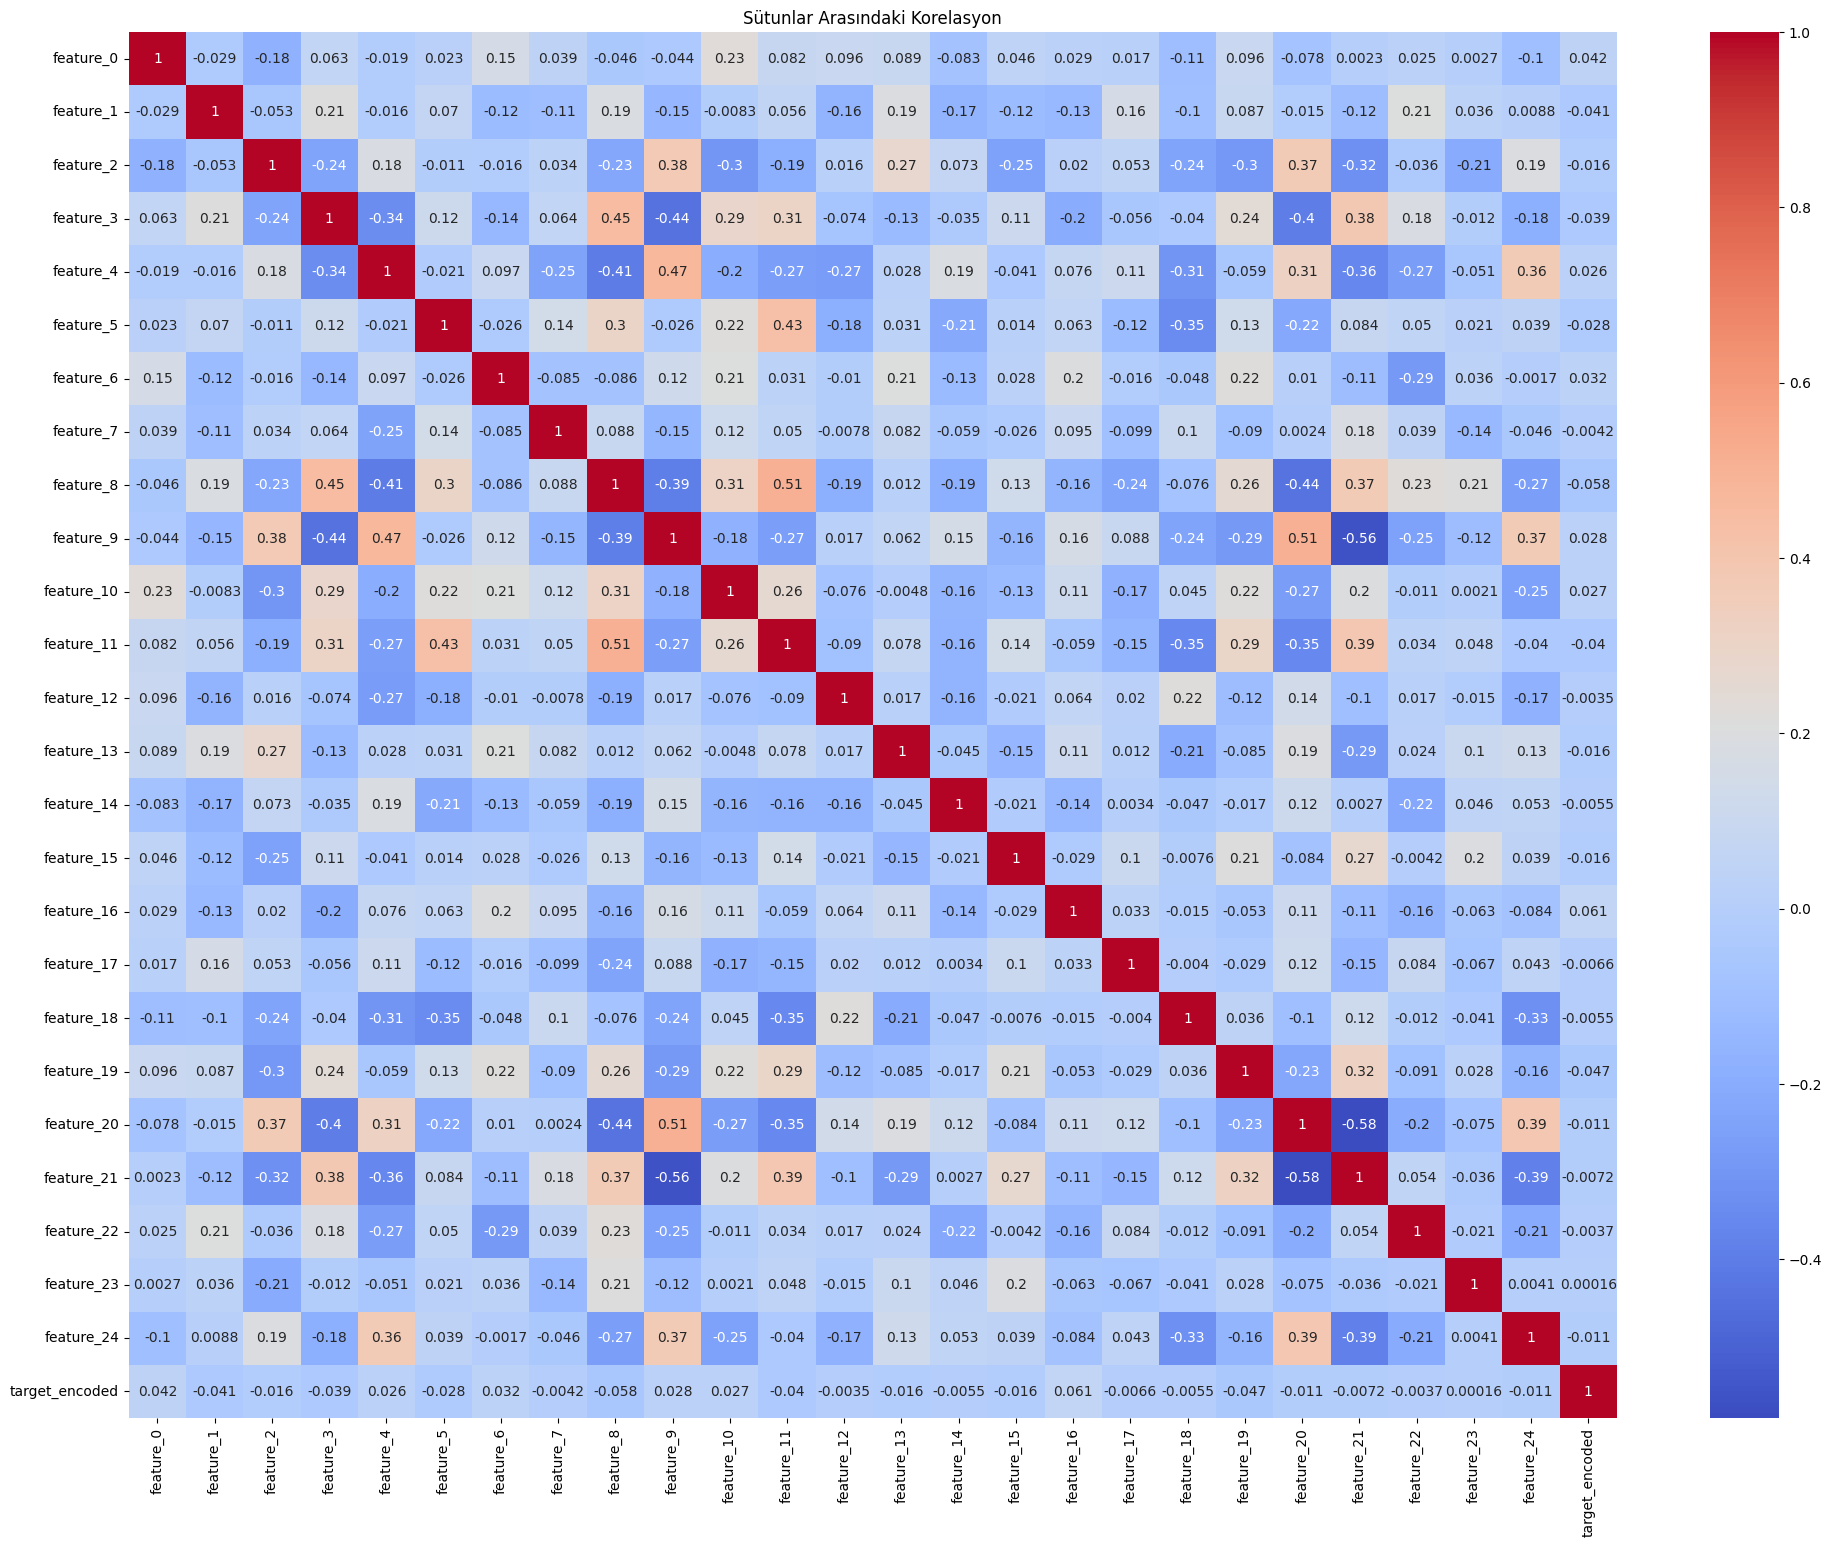

In [100]:
features_corr = df.loc[:, 'feature_0':'feature_24']
features_corr['target_encoded'] = df['target_encoded']
corr_matrix = features_corr.corr()

plt.figure(figsize=(24, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Sütunlar Arasındaki Korelasyon")
plt.show()

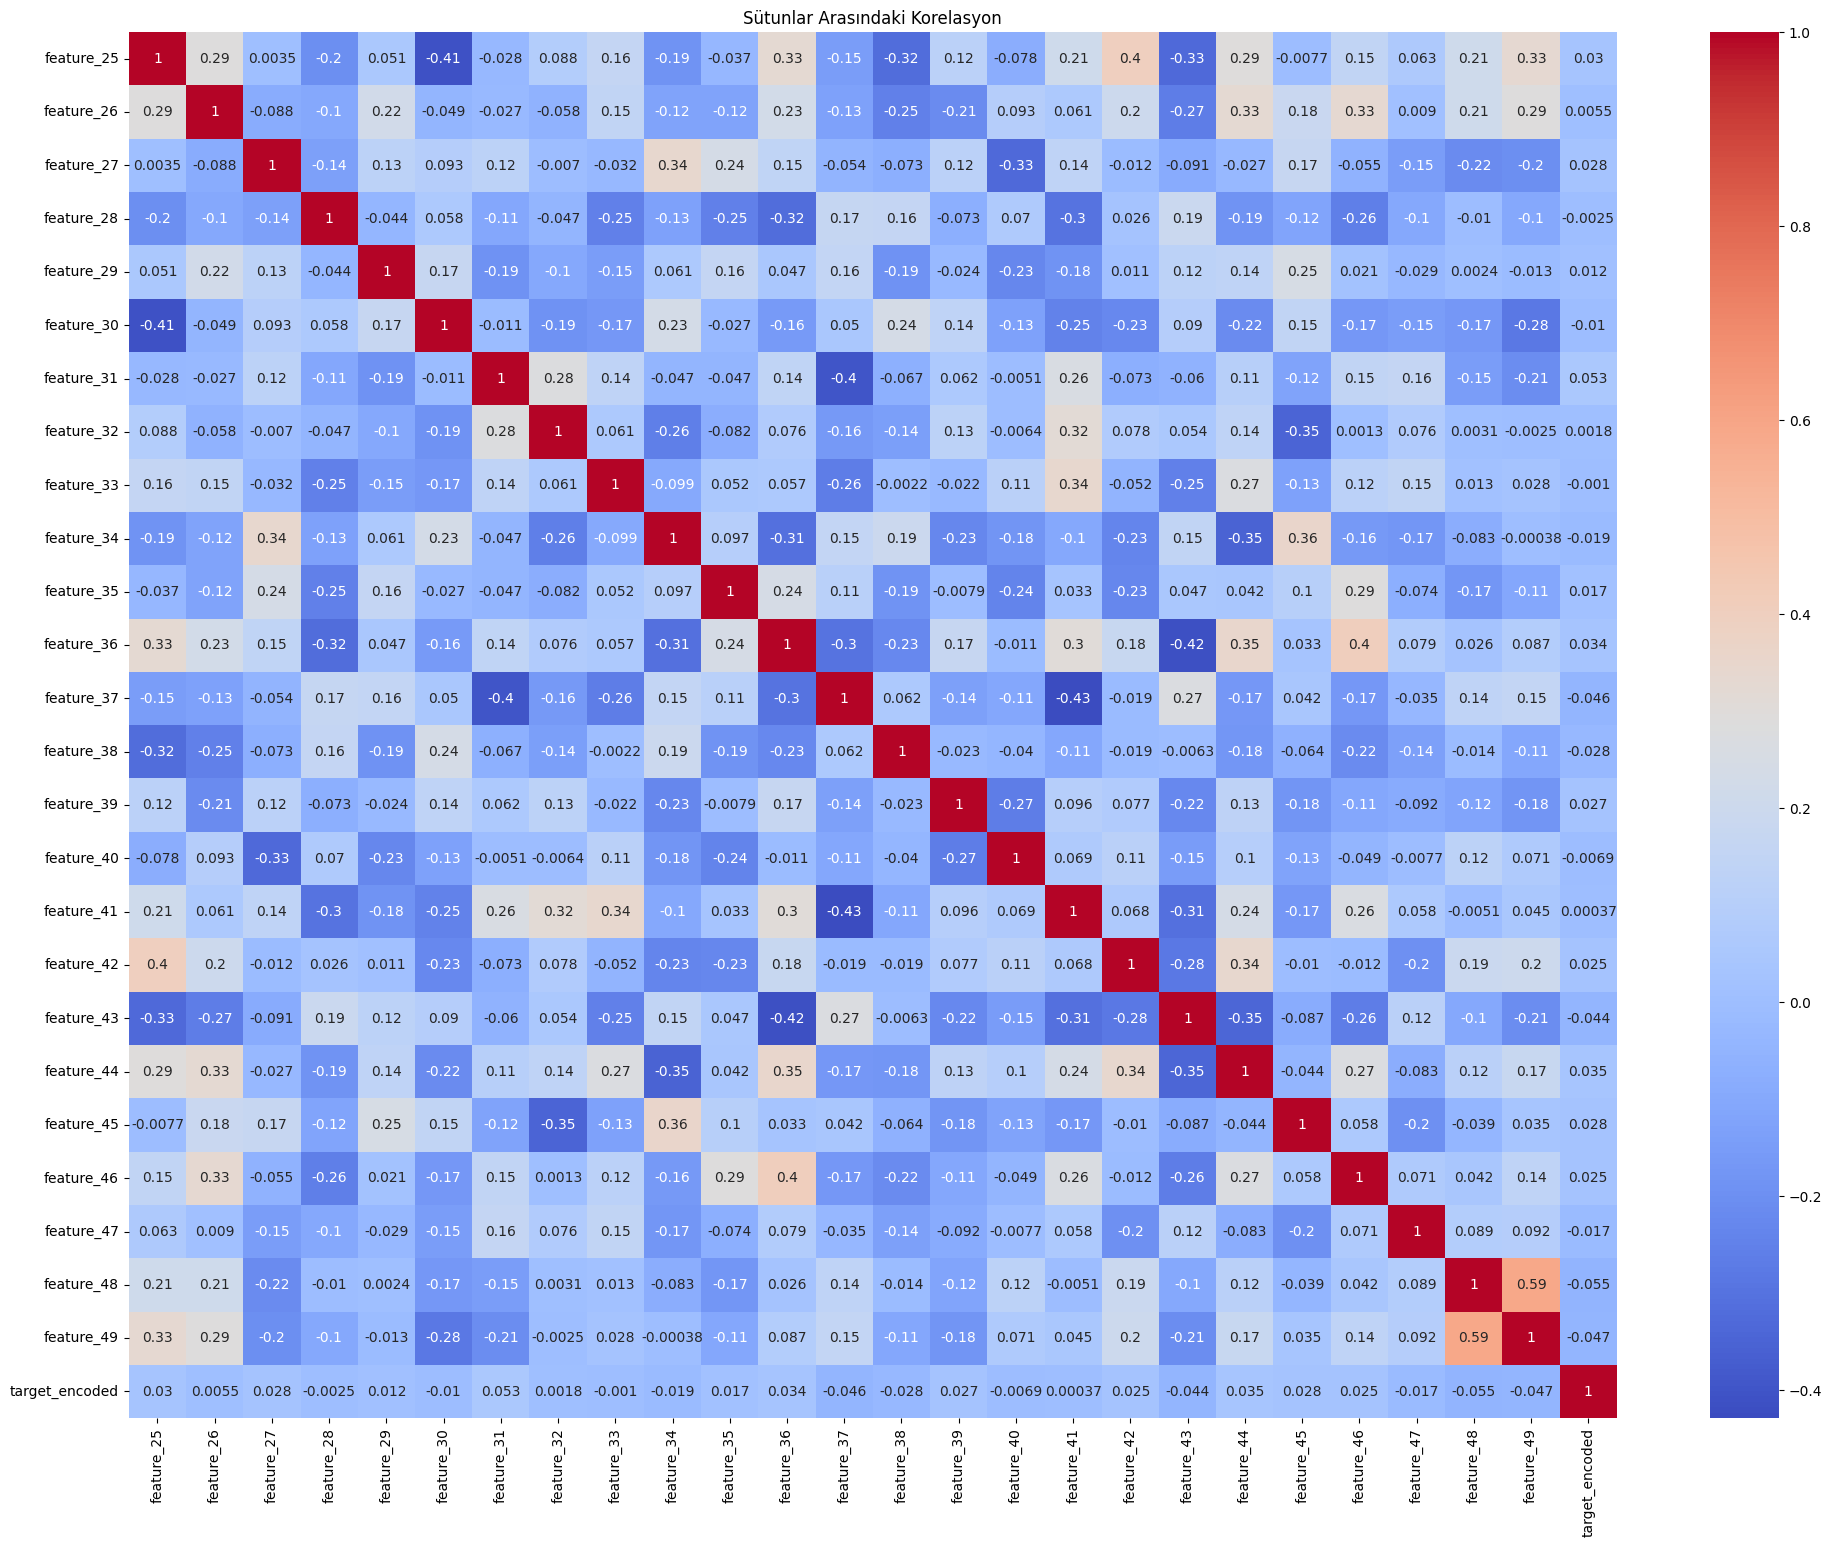

In [98]:
features_corr = df.loc[:, 'feature_25':'target_encoded']
features_corr = features_corr.drop(columns=['target'])
corr_matrix = features_corr.corr()

plt.figure(figsize=(24, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Sütunlar Arasındaki Korelasyon")
plt.show()